In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import StratifiedKFold

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
from tensorflow import keras

In [3]:
directory = 'modified_data/'

eeg_data = []
labels = []
for filename in os.scandir(directory):
    data = pd.read_csv(filename.path)
    if (data["label"][0] == 'Like'):
        labels.append(0)
    else:
        labels.append(1)
    eeg_data.append(data.drop(['label'] , axis = 1))
    

In [4]:
labels = np.array(labels)

In [6]:
eeg_data = np.array(eeg_data)

In [7]:
# print(like_samples.shape , dislike_samples.shape)
eeg_data.shape

(1045, 512, 14)

In [8]:
test_data = eeg_data[:83]
test_label = labels[:83]

eeg_data = eeg_data[83:]
labels = labels[83:]

In [12]:
k_fold = list(kfold.split(eeg_data , labels))

In [19]:
# Set input shape for CNN

input_shape = (512,14,1)

# Define CNN model architecture
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu' , input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Flatten())


model.add(Dense(164, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))


In [20]:

model.compile(keras.optimizers.Adam(learning_rate = 0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
folds = []

In [23]:
validation_scores = []
for train_indices, val_indices in k_fold:
    
    X_train, X_val = eeg_data[train_indices], eeg_data[val_indices]
    y_train, y_val = labels[train_indices], labels[val_indices]
    
#     train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
#     test_0, test_1 = len(y_val[y_val==0]), len(y_val[y_val==1])
#     print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
    # Train the model on the training data for this fold
    folds.append(model.fit(X_train, y_train, epochs = 200 , batch_size = 16))

    # Evaluate the model on the validation data for this fold
    score = model.evaluate(X_val, y_val)
    validation_scores.append(score)
#     print('Validation score:', score)


Epoch 1/200
49/49 [==============================] - 4s 67ms/step - loss: 1.2349 - accuracy: 0.5449
Epoch 2/200
49/49 [==============================] - 3s 67ms/step - loss: 0.6036 - accuracy: 0.7230
Epoch 3/200
49/49 [==============================] - 3s 66ms/step - loss: 0.5140 - accuracy: 0.7633
Epoch 4/200
49/49 [==============================] - 3s 65ms/step - loss: 0.4043 - accuracy: 0.8166
Epoch 5/200
49/49 [==============================] - 3s 63ms/step - loss: 0.2670 - accuracy: 0.8947
Epoch 6/200
49/49 [==============================] - 3s 63ms/step - loss: 0.2463 - accuracy: 0.9090
Epoch 7/200
49/49 [==============================] - 3s 64ms/step - loss: 0.1894 - accuracy: 0.9311
Epoch 8/200
49/49 [==============================] - 3s 64ms/step - loss: 0.1436 - accuracy: 0.9545
Epoch 9/200
49/49 [==============================] - 3s 66ms/step - loss: 0.1309 - accuracy: 0.9545
Epoch 10/200
49/49 [==============================] - 3s 63ms/step - loss: 0.1290 - accuracy: 0.9571

49/49 [==============================] - 3s 62ms/step - loss: 4.0217e-04 - accuracy: 1.0000
Epoch 163/200
49/49 [==============================] - 3s 62ms/step - loss: 0.0013 - accuracy: 0.9987
Epoch 164/200
49/49 [==============================] - 3s 62ms/step - loss: 7.1146e-04 - accuracy: 1.0000
Epoch 165/200
49/49 [==============================] - 3s 63ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 166/200
49/49 [==============================] - 3s 61ms/step - loss: 2.6260e-04 - accuracy: 1.0000
Epoch 167/200
49/49 [==============================] - 3s 61ms/step - loss: 4.5101e-04 - accuracy: 1.0000
Epoch 168/200
49/49 [==============================] - 3s 60ms/step - loss: 4.4281e-04 - accuracy: 1.0000
Epoch 169/200
49/49 [==============================] - 3s 60ms/step - loss: 0.0075 - accuracy: 0.9974
Epoch 170/200
49/49 [==============================] - 3s 62ms/step - loss: 0.0082 - accuracy: 0.9961
Epoch 171/200
49/49 [==============================] - 3s 61ms/step - loss: 

49/49 [==============================] - 3s 66ms/step - loss: 1.8720e-04 - accuracy: 1.0000
Epoch 121/200
49/49 [==============================] - 3s 66ms/step - loss: 7.5512e-05 - accuracy: 1.0000
Epoch 122/200
49/49 [==============================] - 3s 63ms/step - loss: 2.6956e-04 - accuracy: 1.0000
Epoch 123/200
49/49 [==============================] - 3s 66ms/step - loss: 3.2173e-04 - accuracy: 1.0000
Epoch 124/200
49/49 [==============================] - 3s 64ms/step - loss: 6.4022e-05 - accuracy: 1.0000
Epoch 125/200
49/49 [==============================] - 3s 62ms/step - loss: 5.2747e-04 - accuracy: 1.0000
Epoch 126/200
49/49 [==============================] - 3s 63ms/step - loss: 4.5211e-04 - accuracy: 1.0000
Epoch 127/200
49/49 [==============================] - 3s 60ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 128/200
49/49 [==============================] - 3s 60ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 129/200
49/49 [==============================] - 3s 61ms/step 

49/49 [==============================] - 3s 53ms/step - loss: 6.1670e-05 - accuracy: 1.0000
Epoch 77/200
49/49 [==============================] - 3s 55ms/step - loss: 1.7897e-04 - accuracy: 1.0000
Epoch 78/200
49/49 [==============================] - 3s 54ms/step - loss: 2.4789e-04 - accuracy: 1.0000
Epoch 79/200
49/49 [==============================] - 3s 57ms/step - loss: 1.1333e-04 - accuracy: 1.0000
Epoch 80/200
49/49 [==============================] - 3s 55ms/step - loss: 1.4469e-04 - accuracy: 1.0000
Epoch 81/200
49/49 [==============================] - 3s 56ms/step - loss: 2.8050e-05 - accuracy: 1.0000
Epoch 82/200
49/49 [==============================] - 3s 61ms/step - loss: 1.5998e-04 - accuracy: 1.0000
Epoch 83/200
49/49 [==============================] - 3s 56ms/step - loss: 1.1449e-04 - accuracy: 1.0000
Epoch 84/200
49/49 [==============================] - 3s 56ms/step - loss: 3.0689e-04 - accuracy: 1.0000
Epoch 85/200
49/49 [==============================] - 3s 55ms/step -

49/49 [==============================] - 3s 55ms/step - loss: 0.0114 - accuracy: 0.9974
Epoch 33/200
49/49 [==============================] - 3s 53ms/step - loss: 0.0097 - accuracy: 0.9948
Epoch 34/200
49/49 [==============================] - 3s 54ms/step - loss: 7.2067e-04 - accuracy: 1.0000
Epoch 35/200
49/49 [==============================] - 3s 51ms/step - loss: 0.0024 - accuracy: 0.9987
Epoch 36/200
49/49 [==============================] - 3s 52ms/step - loss: 3.0220e-04 - accuracy: 1.0000
Epoch 37/200
49/49 [==============================] - 3s 54ms/step - loss: 0.0119 - accuracy: 0.9974
Epoch 38/200
49/49 [==============================] - 3s 55ms/step - loss: 8.0184e-04 - accuracy: 1.0000
Epoch 39/200
49/49 [==============================] - 3s 55ms/step - loss: 0.0047 - accuracy: 0.9974
Epoch 40/200
49/49 [==============================] - 3s 59ms/step - loss: 5.1260e-04 - accuracy: 1.0000
Epoch 41/200
49/49 [==============================] - 3s 57ms/step - loss: 2.2706e-04 - 

Epoch 111/200
49/49 [==============================] - 3s 60ms/step - loss: 3.7181e-05 - accuracy: 1.0000
Epoch 112/200
49/49 [==============================] - 3s 61ms/step - loss: 1.5809e-04 - accuracy: 1.0000
Epoch 113/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0013 - accuracy: 0.9987
Epoch 114/200
49/49 [==============================] - 3s 60ms/step - loss: 9.9057e-05 - accuracy: 1.0000
Epoch 115/200
49/49 [==============================] - 3s 62ms/step - loss: 3.1511e-04 - accuracy: 1.0000
Epoch 116/200
49/49 [==============================] - 3s 65ms/step - loss: 1.2567e-05 - accuracy: 1.0000
Epoch 117/200
49/49 [==============================] - 3s 61ms/step - loss: 8.9626e-04 - accuracy: 1.0000
Epoch 118/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 119/200
49/49 [==============================] - 3s 64ms/step - loss: 5.5723e-05 - accuracy: 1.0000
Epoch 120/200
49/49 [==============================] -

49/49 [==============================] - 3s 62ms/step - loss: 2.6583e-04 - accuracy: 1.0000
Epoch 66/200
49/49 [==============================] - 3s 59ms/step - loss: 2.7266e-05 - accuracy: 1.0000
Epoch 67/200
49/49 [==============================] - 3s 57ms/step - loss: 8.8214e-05 - accuracy: 1.0000
Epoch 68/200
49/49 [==============================] - 3s 58ms/step - loss: 7.4841e-04 - accuracy: 1.0000
Epoch 69/200
49/49 [==============================] - 3s 62ms/step - loss: 3.2116e-04 - accuracy: 1.0000
Epoch 70/200
49/49 [==============================] - 3s 55ms/step - loss: 2.7479e-05 - accuracy: 1.0000
Epoch 71/200
49/49 [==============================] - 3s 52ms/step - loss: 4.2200e-05 - accuracy: 1.0000
Epoch 72/200
49/49 [==============================] - 3s 52ms/step - loss: 9.0327e-05 - accuracy: 1.0000
Epoch 73/200
49/49 [==============================] - 3s 52ms/step - loss: 8.8585e-06 - accuracy: 1.0000
Epoch 74/200
49/49 [==============================] - 3s 55ms/step -

In [24]:
acc =  [a[1]*100 for a in validation_scores]
avg_score = sum(acc) / len(validation_scores)
print('Average validation score:', avg_score)

Average validation score: 95.02428770065308


In [25]:
acc

[78.7564754486084, 97.92746305465698, 98.4375, 100.0, 100.0]

In [27]:
testing_score = []

for modl in folds:
    score = modl.model.evaluate(test_data , test_label)
    testing_score.append(score[1] * 100)

3/3 [==============================] - 0s 21ms/step - loss: 1.2028 - accuracy: 0.8193


In [36]:
training_acc = []
for i in folds:
    training_acc.append(i.history['accuracy'][-1] * 100)

In [29]:
import matplotlib.pyplot as plt

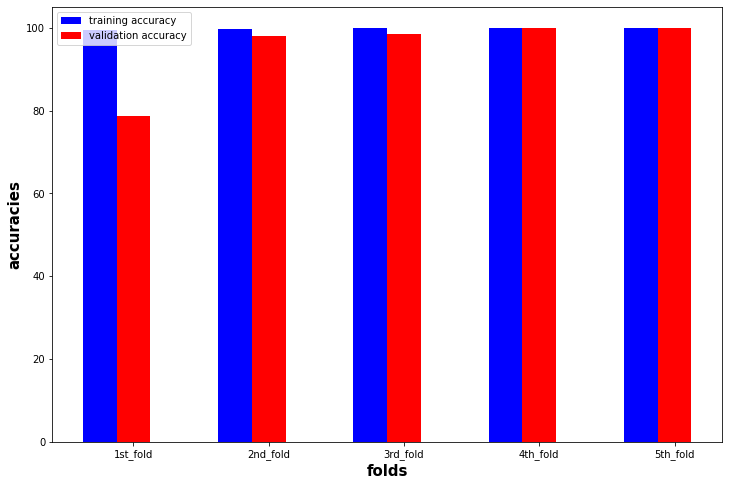

In [37]:
x = ['1st_fold' , '2nd_fold' , '3rd_fold' , '4th_fold' , '5th_fold']
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(x))
br2 = [x + barWidth for x in br1]
plt.bar(br1  , training_acc , color = "blue" , label = "training accuracy" ,width = barWidth)
plt.bar(br2 , acc , color = "red" , label = "validation accuracy" , width = barWidth)
plt.xlabel('folds', fontweight ='bold', fontsize = 15)
plt.ylabel('accuracies', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(x))],x)
 
plt.legend()
plt.show()

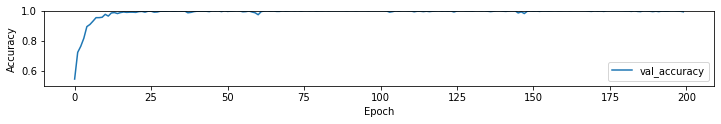

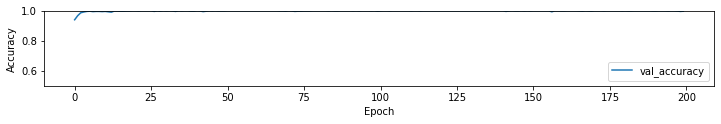

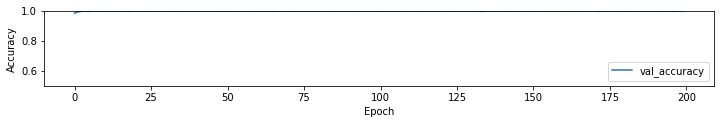

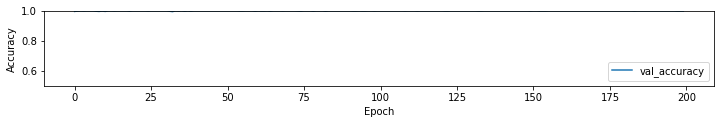

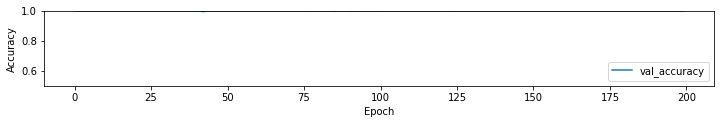

In [38]:
c = 1
co = 0
for i in folds:
    plt.figure(figsize = (12,8))
    plt.subplot(5,1,c)
    plt.plot(i.history['accuracy'], label='val_accuracy')
    
#     plt.plot(i.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    c+=1
    co+=1

In [39]:
y_pred=[]

for data in test_data:
    y_pred.append(np.argmax(model.predict(np.array([data , ]))))

1/1 [==============================] - 0s 22ms/step


# Evaluate model

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

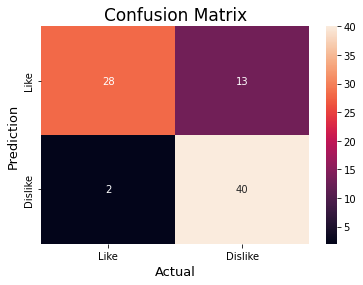

In [42]:
cm = confusion_matrix(test_label,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Like','Dislike'],
            yticklabels=['Like','Dislike'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [43]:
accuaracy = (cm[0][0] + cm[1][1]) / test_data.shape[0] *100
recall = (cm[0][0]) /(cm[0][0] + cm[1][0]) *100
precision = (cm[0][0]) /(cm[0][0] + cm[0][1]) *100
f1_score = (2*recall*precision)/(recall + precision)

In [44]:
print('Accuracy: ' , accuaracy)
print('Precision: ' , precision)
print('Recall: ' , recall)
print('F1 SCore: ' , f1_score)

Accuracy:  81.92771084337349
Precision:  68.29268292682927
Recall:  93.33333333333333
F1 SCore:  78.87323943661971


# save model

In [45]:
model.save('models/modified_5fold_1Model')

INFO:tensorflow:Assets written to: models/modified_5fold_1Model\assets


INFO:tensorflow:Assets written to: models/modified_5fold_1Model\assets
